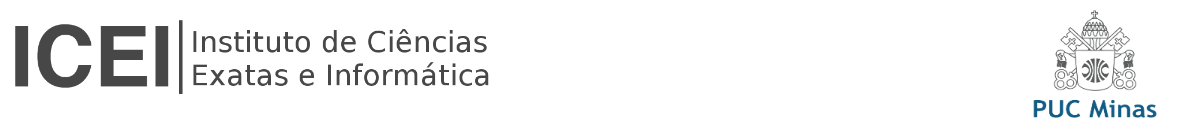

---

# Introdução ao Tensorflow - Parte 3

---

#### Professor: Felipe Reis

#### Data: 2023-05-20

---
### Importação de bibliotecas 

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random
import time

#import plot_images
from plot_helper import plot_helper as plotter

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Base de Dados CIFAR-10

A base de dados CIFAR-10 consiste em 60.000 imagens coloridas de 32x32, divididas em 10 classes.
Cada classe contém 6.000 imagens por classe. 
O conjunto é dividido em 50.000 imagens de treinamento e 10.000 imagens de teste.

CIFAR é o acrônimo de Canadian Institute For Advanced Research, proprietário da base de dados.
O CIFAR-10 e CIFAR-100 são subconjuntos rotulados de uma base de dados de pequenas imagens que contém 80 milhões de amostras. 

As imagens foram coletadas por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton.

A base está disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

Ela também está disponível na página do Tensorflow: https://www.tensorflow.org/datasets/catalog/cifar10

![CIFAR 10](https://cdn-images-1.medium.com/max/1200/1*SZnidBt7CQ4Xqcag6rd8Ew.png)

Fonte: *Jannik Zürn. **Training a CIFAR-10 classifier in the cloud using TensorFlow and Google Colab**. 2018. Disponível em: https://jannik-zuern.medium.com/training-a-cifar-10-classifier-in-the-cloud-using-tensorflow-and-google-colab-f3a5fbdfe24d. Acesso em: 05 de outubro de 2021.*

In [4]:
#download da base de dados
cifar10 = keras.datasets.cifar10

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#remove 1 dimensão dos arrays de label
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
#impressão da quantidade de imagens da base
print('Conjunto treino: {} amostras'.format(len(train_images)))
print('Conjunto teste: {} amostras'.format(len(test_images)))

Conjunto treino: 50000 amostras
Conjunto teste: 10000 amostras


In [6]:
#definicao dos nomes das classes
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado', 
               'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

### Análise dos Dados

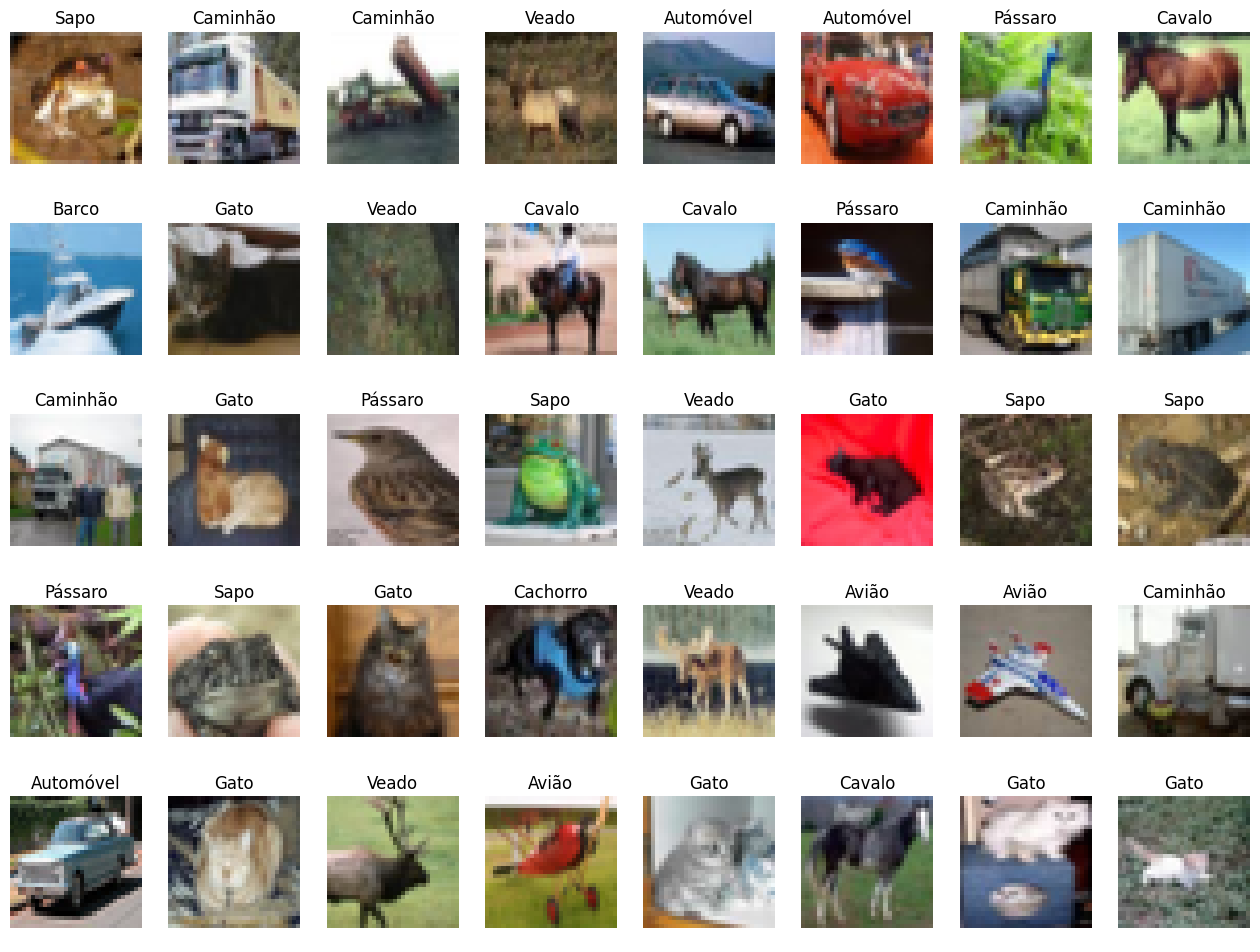

In [7]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

---
## Pré processamento

Podemos classificar o conjunto de dados utilizando os mesmos modelos utilizados no último no Notebook 1.

In [8]:
#pré processamento
train_images = train_images / 255.0
test_images = test_images / 255.0

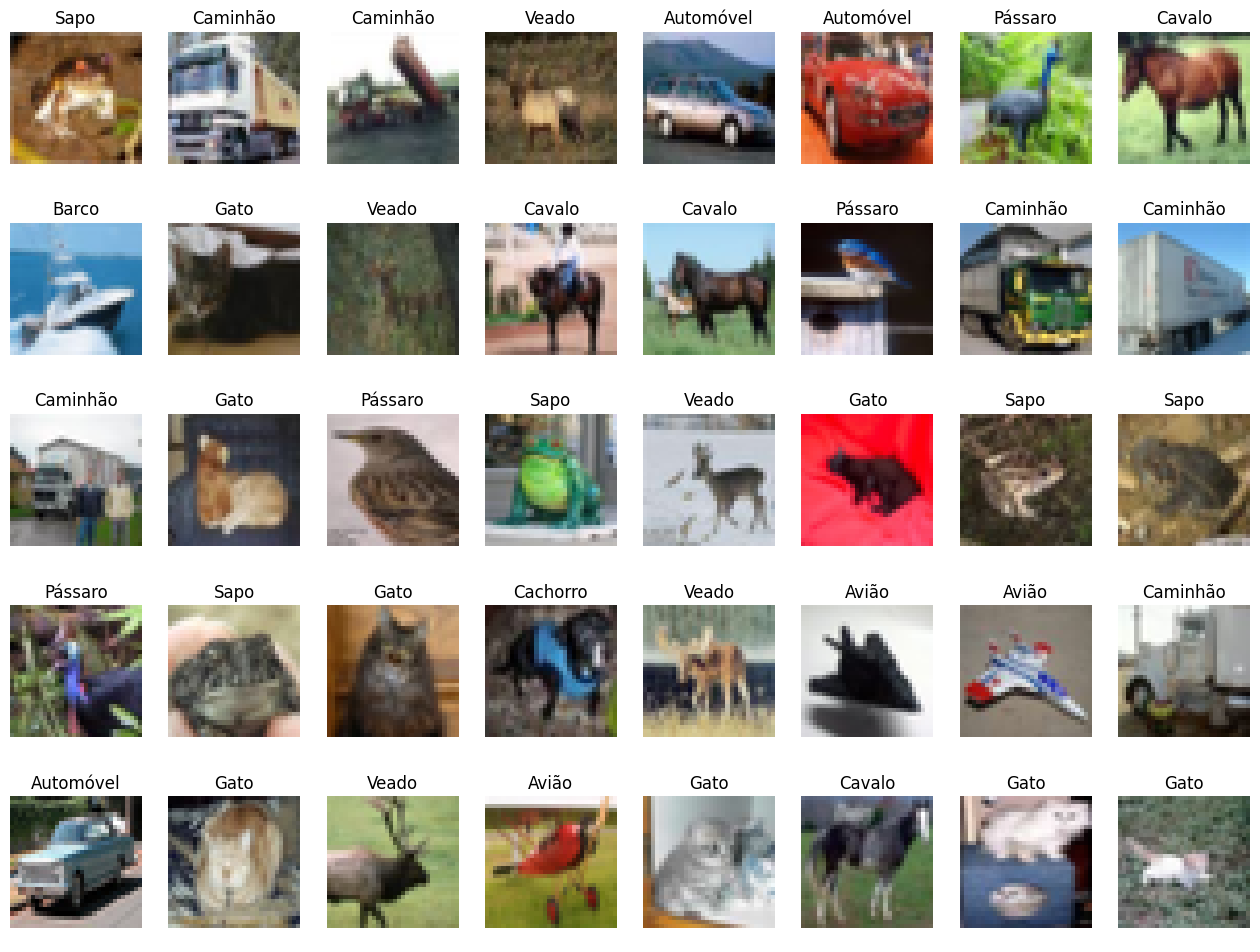

In [9]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

---
## Treinamento do Modelo

O modelo de rede neural abaixo é baseado na arquitetura existente no Notebook 1.

Para adequação ao conjunto CIFAR-10, a entrada foi alterada para suportar imagens de tamanho 32 $\times$ 32 pixels, com 3 canais de cores.

In [10]:
def load_model():
    #modelo de rede sequencial
    return keras.Sequential([
        #transforma a image em um array de imagens de três dimensões (32 x 32 x 3)
        keras.layers.Flatten(input_shape=(32, 32, 3)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

---
## Compilação do Modelo


### Configurações de Compilação

Nesta seção serão detalhadas as algumas configurações de compilação do modelo, possibilitando alterar o otimizador, a função de perda e as métricas de qualidade.

Neste processo, concentraremos nosso estudo no comando `model.compile`.

Informações mais detalhadas e outros parâmetros podem ser encontradas no link: https://keras.io/api/models/model_training_apis/

---
### Funções de Perda

O objetivo da função de perda (*loss function*) é calcular o quanto o resultado predito pelo modelo é similar ao resultado esperado.

Nesse contexto, a função de perda busca minimizar a diferença entre os valores preditos e esperados. Em otimização, a função de perda (ou função de custo ou função de erro) é definido como o oposto da função objetivo.

A função de perda é uma função matemática cujo resultado não está limitado a um intervalo de valores. Com isso, a função de perda pode exibir resultados cuja compreensão pode não ser trivial (ex.: loss = 751.35). Esses valores são calculados e não são normalizados, ou seja, dependem da quantidade de amostras do conjunto, da quantidade de classes, do tamanho das imagens, entre outros atributos.

A comparação entre perdas de dois problemas diferentes pode não ser trivial.

Para alterar a função de perda, devemos utilizar o atributo `loss`.

Mais informações podem ser encontradas no link: https://keras.io/api/losses/

#### Funções de Perda para Classificação

Para treinamento da rede, podemos utilizar diferentes funções de perda. De acordo com a tarefa e a representação de dados utilizada, podemos escolher a função mais adequada. Seguem abaixo algumas funções de perda comuns.

A função `binary_crossentropy` calcula o [*cross entropy*](https://en.wikipedia.org/wiki/Cross_entropy) (entropia cruzada) entre rótulos verdadeiros e rótulos previstos, em problemas de classificação binária (0 ou 1). 

A função `categorical_crossentropy` calcula o [*cross entropy*](https://en.wikipedia.org/wiki/Cross_entropy) (entropia cruzada) entre rótulos verdadeiros e rótulos previstos em problemas de classificação categórica. Essa função, no entanto, requer que os rótulos sejam fornecidos em uma representação [*one_hot*](https://minerandodados.com.br/one-hot-encoding-como-funciona-python/). Esse tipo de codificação é usada para evitar que exista influência da codificação numérica das classes sobre o resultado final do algoritmo.

A função `sparse_categorical_crossentropy` calcula o [*cross entropy*](https://en.wikipedia.org/wiki/Cross_entropy) (entropia cruzada) entre rótulos verdadeiros e rótulos previstos em problemas de classificação categórica. Essa função é uma alternativa à função `categorical_crossentropy`, não exigindo que os dados estejam em formato [*one_hot*](https://minerandodados.com.br/one-hot-encoding-como-funciona-python/).

A função `kl_divergence` calcula a [divergência de Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) entre rótulos verdadeiros e rótulos previstos em problemas de classificação categórica.

A função `categorical_hinge` calcula o [*hinge loss*](https://en.wikipedia.org/wiki/Hinge_loss) entre rótulos verdadeiros e rótulos previstos em problemas de classificação categórica.  Essa função, no entanto, requer que os rótulos sejam fornecidos em uma representação [*one_hot*](https://minerandodados.com.br/one-hot-encoding-como-funciona-python/).

O Keras conta com outras funções de perda. Além disso, é possível programar outras funções de perda, para melhor desempenho do algoritmo (ou para tarefas cuja função de perda deva ter um comportamento distinto).


#### Funções de Perda para Regressão

Para problemas de regressão, podemos utilizar funções de perda mais adequadas à tarefa. 

Entre as principais funções de perda, destacam-se as seguintes funções:

- Similaridade por Cosseno ([Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)), definida pelo comando `cosine_similarity`;
- Erro Quadrático Médio ([MSE - Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), definida pelo comando `mean_squared_error`;
- Erro Absoluto Médio ([MAE - Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)) , definida pelo comando `mean_absolute_error`.

In [11]:
#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.8901 - accuracy: 0.3249
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7188 - accuracy: 0.3920
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6405 - accuracy: 0.4231
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5889 - accuracy: 0.4424
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5526 - accuracy: 0.4543
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5210 - accuracy: 0.4659
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4930 - accuracy: 0.4750
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4703 - accuracy: 0.4832
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4500 - accuracy: 0.4909
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.43

In [12]:
#o código abaixo propositalmente ocasionará erro
#seu objetivo é mostrar o uso inadequado da função de loss

#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10


ValueError: ignored

##### Função Categorical Cross Entropy

Podemos converter nossos rótulos (*labels*) para o formato *one hot*, com auxílio do código abaixo.

Essa transformação permite que utilizemos a função `categorical_crossentropy`.

In [13]:
indices = train_labels
depth = 10

one_hot_train_labels = tf.one_hot(indices, depth)

print(train_images.shape)
print(one_hot_train_labels.shape)
print(one_hot_train_labels)

(50000, 32, 32, 3)
(50000, 10)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(50000, 10), dtype=float32)


In [14]:
#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, one_hot_train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8936 - accuracy: 0.3206
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7154 - accuracy: 0.3943
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6428 - accuracy: 0.4216
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5957 - accuracy: 0.4390
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5617 - accuracy: 0.4504
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5296 - accuracy: 0.4621
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5003 - accuracy: 0.4732
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4809 - accuracy: 0.4784
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4582 - accuracy: 0.4858
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.436

---
### Métricas

A métrica é uma função usada para avaliar o desempenho de um modelo de rede neural.

As métricas não são utilizadas para treinamento da rede. Somente fornecem uma informação estatística a respeito da qualidade dos resultados (intermediários ou finais).

Ao contrário da função de perda, a métrica normalmente é limitada a um intervalo de valores, possibilitando a comparação de resultados de forma trivial. Devido a sua natureza, os valores, em geral, são limitados ao intervalo 0-100. 

Métricas não são adequadas como funções de perda uma vez que os resultados somente indicam "acertos" e "erros", sem expressar a evolução do treinamento (ex.: a métrica não melhorou, porém a previsão foi mais próxima do rótulo verdadeiro, indicando que o algoritmo está melhorando - o que é possível com a função de perda).

Em alguns cenários, pode ser vantajoso utilizar as próprias funções de perda (como em problemas de regressão). Não há restrições quanto a isso.

Para alterar, adicionar ou remover métricas, podemos o atributo `metrics`.

Mais informações podem ser encontradas no link: https://keras.io/api/metrics/


#### Métricas para Classificação

- [Acurácia](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class);
- [Acurácia Binária](https://keras.io/api/metrics/accuracy_metrics/#binaryaccuracy-class);
- [Acurácia Categórica](https://keras.io/api/metrics/accuracy_metrics/#categoricalaccuracy-class);
- [Precisão](https://keras.io/api/metrics/classification_metrics/#precision-class);
- [Revocação](https://keras.io/api/metrics/classification_metrics/#recall-class);
- [AUC](https://keras.io/api/metrics/classification_metrics/#auc-class).

#### Métricas para Regressão

- [Cosine Similarity](https://keras.io/api/metrics/regression_metrics/#cosinesimilarity-class);
- [MSE](https://keras.io/api/metrics/regression_metrics/#meansquarederror-class);
- [MAE](https://keras.io/api/metrics/regression_metrics/#meanabsoluteerror-class).

#### Métricas para Segmentação

Interseção sobre União Média (*Mean Intersection-Over-Union*) é uma métrica de avaliação de segmentação semântica de imagens. Primeiro calcula o IOU para cada classe semântica e, em seguida, calcula a média sobre as classes.

- [MeanIOU](https://keras.io/api/metrics/segmentation_metrics/#meaniou-class).

In [15]:
#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
               metrics=['accuracy', 'binary_accuracy', tf.keras.metrics.SparseCategoricalAccuracy()])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8873 - accuracy: 0.3279 - binary_accuracy: 0.0995 - sparse_categorical_accuracy: 0.3279
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7181 - accuracy: 0.3925 - binary_accuracy: 0.0999 - sparse_categorical_accuracy: 0.3925
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6483 - accuracy: 0.4215 - binary_accuracy: 0.1003 - sparse_categorical_accuracy: 0.4215
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5996 - accuracy: 0.4370 - binary_accuracy: 0.1006 - sparse_categorical_accuracy: 0.4370
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5612 - accuracy: 0.4506 - binary_accuracy: 0.1008 - sparse_categorical_accuracy: 0.4506
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5269 - accuracy: 0.4650 - binary_accuracy: 0.1008 - sparse_categorical_accuracy: 0.4650
Epoc

#### Métricas Precisão e Revocação

Podemos utilizar as métricas Precisão e Revocação caso façamos a alteração da função de perda para `categorical_crossentropy`.

Caso contrário, o sistema acusa erro.

In [16]:
#transforma o modelo em one hot
one_hot_train_labels = tf.one_hot(train_labels, 10)

#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='categorical_crossentropy', 
               metrics=[tf.keras.metrics.Precision(name='precision'), 
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.PrecisionAtRecall(0.5)])

#treina o modelo
model1.fit(train_images, one_hot_train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8856 - precision: 0.6095 - recall: 0.0518 - precision_at_recall: 0.2718
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7084 - precision: 0.6523 - recall: 0.1132 - precision_at_recall: 0.3595
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6346 - precision: 0.6645 - recall: 0.1513 - precision_at_recall: 0.3978
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5853 - precision: 0.6744 - recall: 0.1790 - precision_at_recall: 0.4196
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5450 - precision: 0.6866 - recall: 0.2006 - precision_at_recall: 0.4471
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5143 - precision: 0.6910 - recall: 0.2171 - precision_at_recall: 0.4641
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4857 - precision: 0.69

---
### Otimizadores

Otimizadores correspondem aos métodos numéricos utilizados para minimização do erro esperado.

O objetivo é reduzir a diferença entre a saída predita e a saída esperada.

No Tensorflow, o otimizador é definido pelo atributo `optimizer`, ao executar o método `compile` do modelo.

Podemos, por padrão usar os seguintes otimizadores:

- [SGD](https://keras.io/api/optimizers/sgd/);
- [RMSprop](https://keras.io/api/optimizers/rmsprop/);
- [Adam](https://keras.io/api/optimizers/adam/);
- [Adadelta](https://keras.io/api/optimizers/adadelta/);
- [Adagrad](https://keras.io/api/optimizers/adagrad/);
- [Adamax](https://keras.io/api/optimizers/adamax/);
- [Nadam](https://keras.io/api/optimizers/Nadam/);
- [Ftrl](https://keras.io/api/optimizers/ftrl/).

É possível configurar esses otimizadores, conforme veremos na sequência, de modo a customizá-los.

O Tensorflow ainda permite a criação de otimizadores próprios, que podem ser usados na tentativa de aumentar o desempenho da rede.

Mais informações podem ser encontradas no link: https://keras.io/api/optimizers/

In [17]:
#gera modelo
model1 = load_model()

#compila o modelo
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8844 - accuracy: 0.3259
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7201 - accuracy: 0.3934
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6482 - accuracy: 0.4182
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5979 - accuracy: 0.4367
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5582 - accuracy: 0.4539
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5265 - accuracy: 0.4639
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4974 - accuracy: 0.4744
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4739 - accuracy: 0.4836
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4545 - accuracy: 0.4894
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.435

In [18]:
#gera modelo
model1 = load_model() #o modelo foi recarregado para melhor comparação dos otimizadores

#compila o modelo
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9627 - accuracy: 0.2949
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7804 - accuracy: 0.3617
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7245 - accuracy: 0.3831
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6971 - accuracy: 0.3932
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6711 - accuracy: 0.4044
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6534 - accuracy: 0.4135
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6359 - accuracy: 0.4174
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6242 - accuracy: 0.4219
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6128 - accuracy: 0.4262
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.604

In [19]:
#gera modelo
model1 = load_model() #o modelo foi recarregado para melhor comparação dos otimizadores

#compila o modelo
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8985 - accuracy: 0.3163
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7507 - accuracy: 0.3719
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6977 - accuracy: 0.3921
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6673 - accuracy: 0.4023
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6373 - accuracy: 0.4139
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6223 - accuracy: 0.4161
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6034 - accuracy: 0.4230
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5925 - accuracy: 0.4280
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5825 - accuracy: 0.4339
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.576

#### Taxa de Aprendizado (*Learning Rate*)

A taxa de aprendizado corresponde a taxa de atualização de pesos de uma rede neural. Pode ser entendida como o tamanho do passo em uma dada iteração diminuição da perda da rede.

A taxa de aprendizado é frequentemente denotada pela letra $\eta$ (eta).

Podemos definir explicitamente a taxa de aprendizado da rede, com auxílio dos otimizadores. Para isso, devemos utilizar instanciar um objeto correspondente ao otimizador que queremos utilizar e, em seguida, definir a taxa de aprendizado.

O valor ideal da taxa de aprendizado pode variar de acordo com o otimizador.

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8859 - accuracy: 0.3256
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7154 - accuracy: 0.3930
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6411 - accuracy: 0.4199
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5896 - accuracy: 0.4408
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5508 - accuracy: 0.4550
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5180 - accuracy: 0.4685
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4904 - accuracy: 0.4745
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4664 - accuracy: 0.4842
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4445 - accuracy: 0.4924
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.425

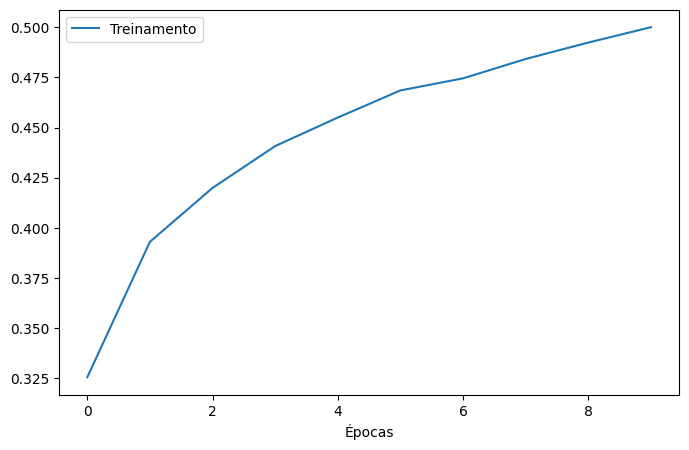

In [20]:
#gera modelo
model1 = load_model() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

#compila o modelo
model1.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(train_images, train_labels, epochs=10)

# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy'], legend=['Treinamento', 'Validação'])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9047 - accuracy: 0.3159
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7556 - accuracy: 0.3754
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7120 - accuracy: 0.3889
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6812 - accuracy: 0.3985
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6584 - accuracy: 0.4088
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6433 - accuracy: 0.4114
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6281 - accuracy: 0.4163
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6172 - accuracy: 0.4222
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6056 - accuracy: 0.4240
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.601

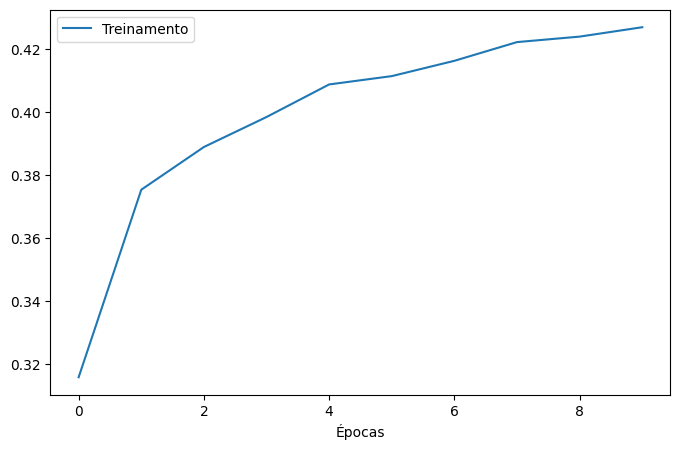

In [21]:
#gera modelo
model1 = load_model() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(train_images, train_labels, epochs=10)

# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy'], legend=['Treinamento', 'Validação'])

#### Decaimento da Taxa de Aprendizado (*Learning Rate Decay*)

Ao definir a taxa de aprendizado, podemos querer que nossa rede inicie com um taxa de aprendizado e, em seguida, a taxa descresça constantemente.

Nesse caso, busca-se uma atualização de peso mais brusca no início do treinamento e uma atualização mais suave após algumas épocas, com objetivo de refinamento.

Para isso, podemos utilizar uma função de decaimento, que fará com que a função de perda diminua ao longo do tempo.

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8993 - accuracy: 0.3197
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7417 - accuracy: 0.3766
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6860 - accuracy: 0.3994
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6566 - accuracy: 0.4108
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6265 - accuracy: 0.4236
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6048 - accuracy: 0.4320
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5885 - accuracy: 0.4382
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5735 - accuracy: 0.4449
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5616 - accuracy: 0.4506
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.549

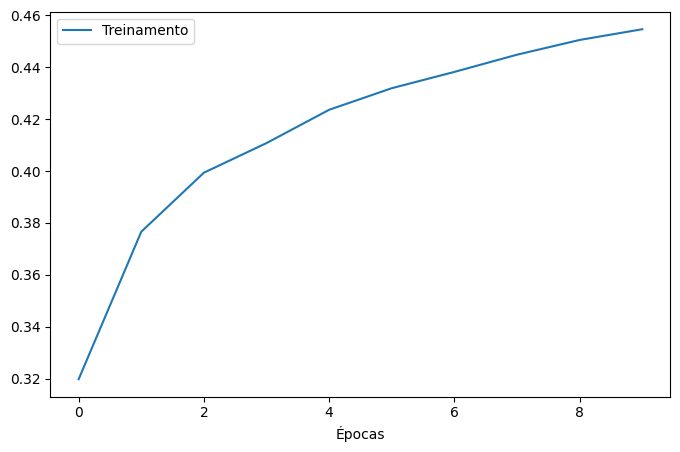

In [22]:
#gera modelo
model1 = load_model() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o decaimento da taxa de aprendizado
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(train_images, train_labels, epochs=10)

# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy'], legend=['Treinamento', 'Validação'])

----
----

## Tarefas 

### Tarefa 1 (30 minutos)

Treine a rede desenvolvida na Tarefa 1 - Notebook 2 no conjunto de dados CIFAR-10.

Altere os parâmetros de compilação, como otimizadores, funções de perda e as métricas de avaliação.

#### Atividades Sugeridas

- Altere os otimizadores e veja a diferença na acurácia;
- Altere as taxas de aprendizado e decaimento da rede;
- Teste algumas funções de perda distintas;
- Altere as métricas de avaliação: caso queira, adicione múltiplas métricas.
- Plote gráficos para verificar a existência de overfitting.

In [23]:
#insira seu modelo aqui (arquitetura de rede)

In [24]:
#compile seu modelo aqui

In [25]:
#treine seu modelo aqui

In [26]:
#imprima o gráfico de treinamento aqui

In [27]:
#avalie seu modelo aqui

----

### Tarefa 2 (30 minutos)

Treine a rede desenvolvida na tarefa anterior no conjunto de dados CIFAR-100.

Comece com o melhor resultado obtido na tarefa anterior e altere os parâmetros de compilação, como otimizadores, taxas de aprendizado e funções de perda.

Informações sobre a base de dados: https://www.cs.toronto.edu/~kriz/cifar.html

![CIFAR 100](https://web.stanford.edu/~hastie/CASI_files/DATA/cifar100.jpg)

Fonte: *Trevor Hastie. **CIFAR-100 image database**. Disponível em: https://web.stanford.edu/~hastie/CASI_files/DATA/cifar-100.html. Acesso em: 16 de outubro de 2021.*

#### Atividades Sugeridas

- Altere os otimizadores e veja a diferença na acurácia;
- Altere as taxas de aprendizado e decaimento da rede;
- Teste algumas funções de perda distintas;
- Altere as métricas de avaliação: caso queira, adicione múltiplas métricas.
- Plote gráficos para verificar a existência de overfitting.

In [28]:
#download da base de dados
cifar100 = keras.datasets.cifar100

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#remove 1 dimensão dos arrays de label
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

169001437/169001437 [==============================] - 14s 0us/step


In [29]:
#definicao dos nomes das classes CIFAR100
class_names_100 = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 
    'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 
    'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 
    'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
    'rose', 'sea', 'seal', 'shark', 'shrew', 
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
    'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [30]:
#insira seu modelo aqui (arquitetura de rede)

In [31]:
#compile seu modelo aqui

In [32]:
#treine seu modelo aqui

In [33]:
#imprima o gráfico de treinamento aqui

In [34]:
#avalie seu modelo aqui